<h3>Step 1: Import libraries</h3>

In [51]:
import xgboost
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
import pickle
import os

warnings.filterwarnings('ignore')

<h3>Step 2: Import data</h3>

In [52]:
# Read dataset
processed_data = os.path.abspath('../datasets/processed_data.csv')

# merging two csv files
dataframe = pd.read_csv(processed_data)

dataframe.head()

,Location,Day,Hour,AQI,PM2.5,PM10,O3,CO,SO2,NO2,AQI_Class
0,0,26,18,48,24.0,47.0,17.0,210.0,13.0,14.0,a_Good
1,7,22,20,36,18.0,28.0,8.0,346.0,27.0,7.0,a_Good
2,0,28,18,37,19.0,37.0,18.0,272.0,11.0,21.0,a_Good
3,0,28,18,37,19.0,37.0,18.0,272.0,11.0,21.0,a_Good
4,0,27,18,47,24.0,46.0,19.0,216.0,8.0,14.0,a_Good


<h3>Step 3: Split data</h3>

In [53]:
# Selecting features and target variable
X = dataframe[['Location', 'Day', 'Hour', 'PM2.5', 'PM10', 'O3', 'CO', 'SO2', 'NO2']]
y = dataframe['AQI']

# Data scaling
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Splitting into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<h3>Step 4: Feature scaling</h3>

In [54]:
# Scale dataset
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

<h3>Step 5: Train model</h3>

In [55]:
# Побудова моделі XGBoost для регресії
model = xgboost.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)

# Навчання моделі
model.fit(X_train, y_train)

AttributeError: 'super' object has no attribute '__sklearn_tags__'

AttributeError: 'super' object has no attribute '__sklearn_tags__'

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

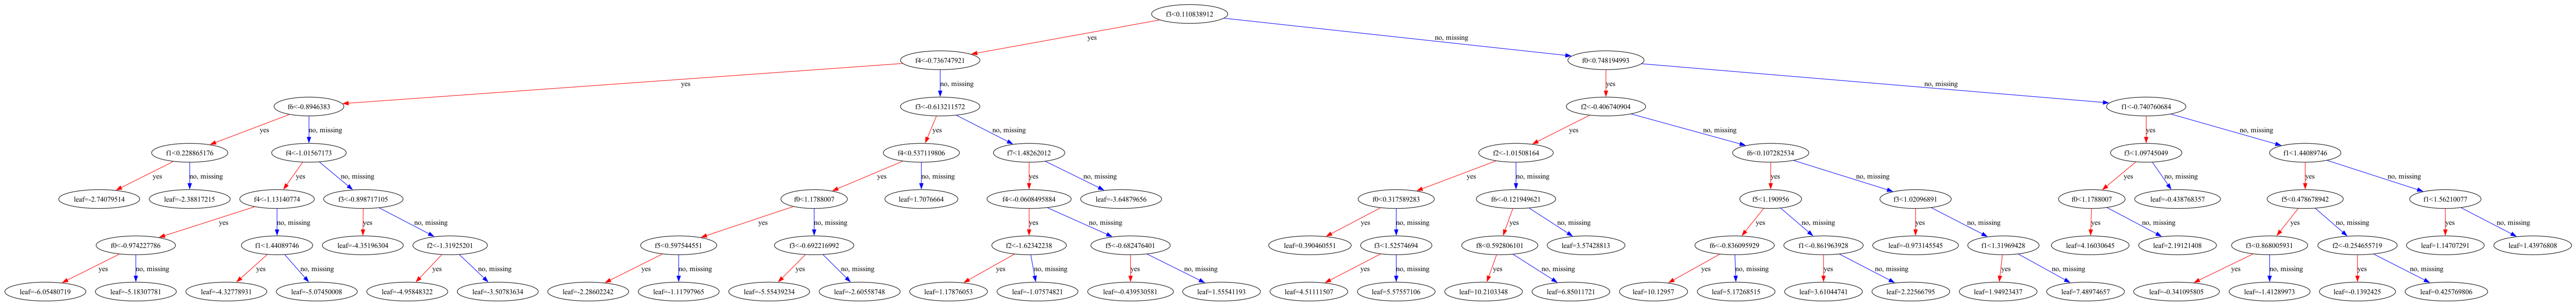

In [56]:
fig, ax = plt.subplots(figsize=(120, 120))
xgboost.plot_tree(model, num_trees=6, ax=ax)
plt.show()

<h3>Step 6: Predict result / Score model</h3>

In [57]:
# Prognostication
y_pred = model.predict(X_test)

<h3>Step 7: Evaluate model</h3>

In [58]:
# Metrics evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R2 Score: {r2:.2f}")

MSE: 0.00
RMSE: 0.00
MAE: 0.00
R2 Score: 1.00


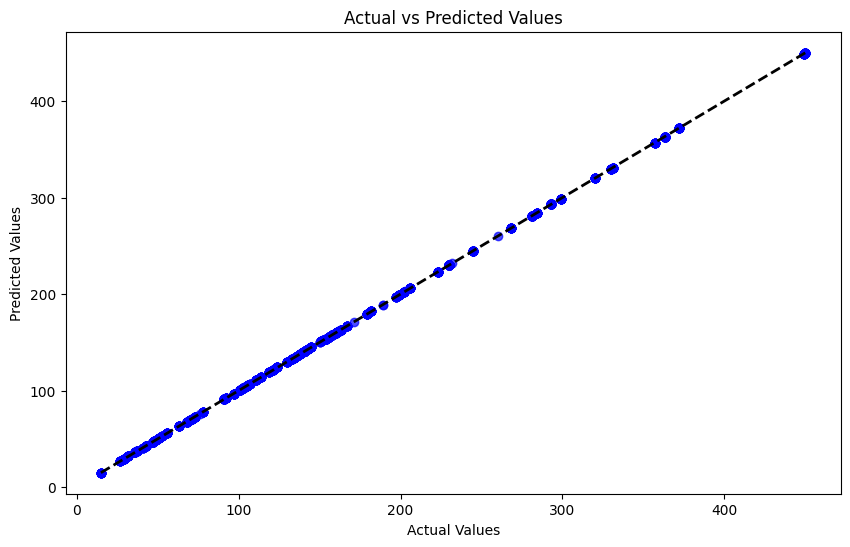

In [59]:
# Visualization of results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='b')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

<h3>Step 8: Feature scaling</h3>

Serialize XG Boost Model in pickle file.

In [60]:
with open('serialized/XGBoostModel.pkl', 'wb') as file:
    pickle.dump(model, file)